In [1]:
!nvidia-smi

Wed Apr  9 17:51:19 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   59C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
import os
from google.colab import drive


In [3]:
# Define home directory
HOME = os.getcwd()
print(f"Current working directory: {HOME}")

Current working directory: /content


In [4]:
# Mount Google Drive (optional)
drive_path = "/content/drive/MyDrive/Yolo_Results"
is_drive_mounted = False


In [5]:
try:
    drive.mount("/content/drive", force_remount=True)
    is_drive_mounted = True
    print("Google Drive mounted successfully.")
    os.makedirs(drive_path, exist_ok=True)
except:
    print("Google Drive mount failed or skipped. Saving locally.")

Mounted at /content/drive
Google Drive mounted successfully.


In [6]:
#  Install YOLO and dependencies
!pip install ultralytics roboflow
from IPython import display
import ultralytics
from ultralytics import YOLO, checks
from roboflow import Roboflow

display.clear_output()
checks()

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.3/112.6 GB disk)


In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BVXlWvetB8rv39GwVQPB")
project = rf.workspace("project-o1umy").project("garbage_overflow-q1zib")
version = project.version(1)
dataset = version.download("yolov8")


/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to garbage_overflow-1 in yolov8:: 100%|██████████| 3378/3378 [00:00<00:00, 5815.80it/s]


In [18]:
# Train YOLOv8 model
%cd {HOME}/datasets/garbage_overflow-1
!yolo task=detect mode=train model=yolov8n.pt data={HOME}/datasets/garbage_overflow-1/data.yaml epochs=20 imgsz=640 batch=16 plots=True

/content/datasets/garbage_overflow-1
100% 6.25M/6.25M [00:00<00:00, 267MB/s]
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/datasets/garbage_overflow-1/data.yaml, epochs=20, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False,

In [20]:
# Define paths
train_results_path = f"{HOME}/datasets/garbage_overflow-1/runs/detect/train"



In [21]:
# Copy results to Drive if mounted
if is_drive_mounted:
    !cp -r {train_results_path} {drive_path}
    print(f"Results saved in Google Drive at: {drive_path}")
else:
    print(f"Results saved locally at: {train_results_path}")

Results saved in Google Drive at: /content/drive/MyDrive/Yolo_Results


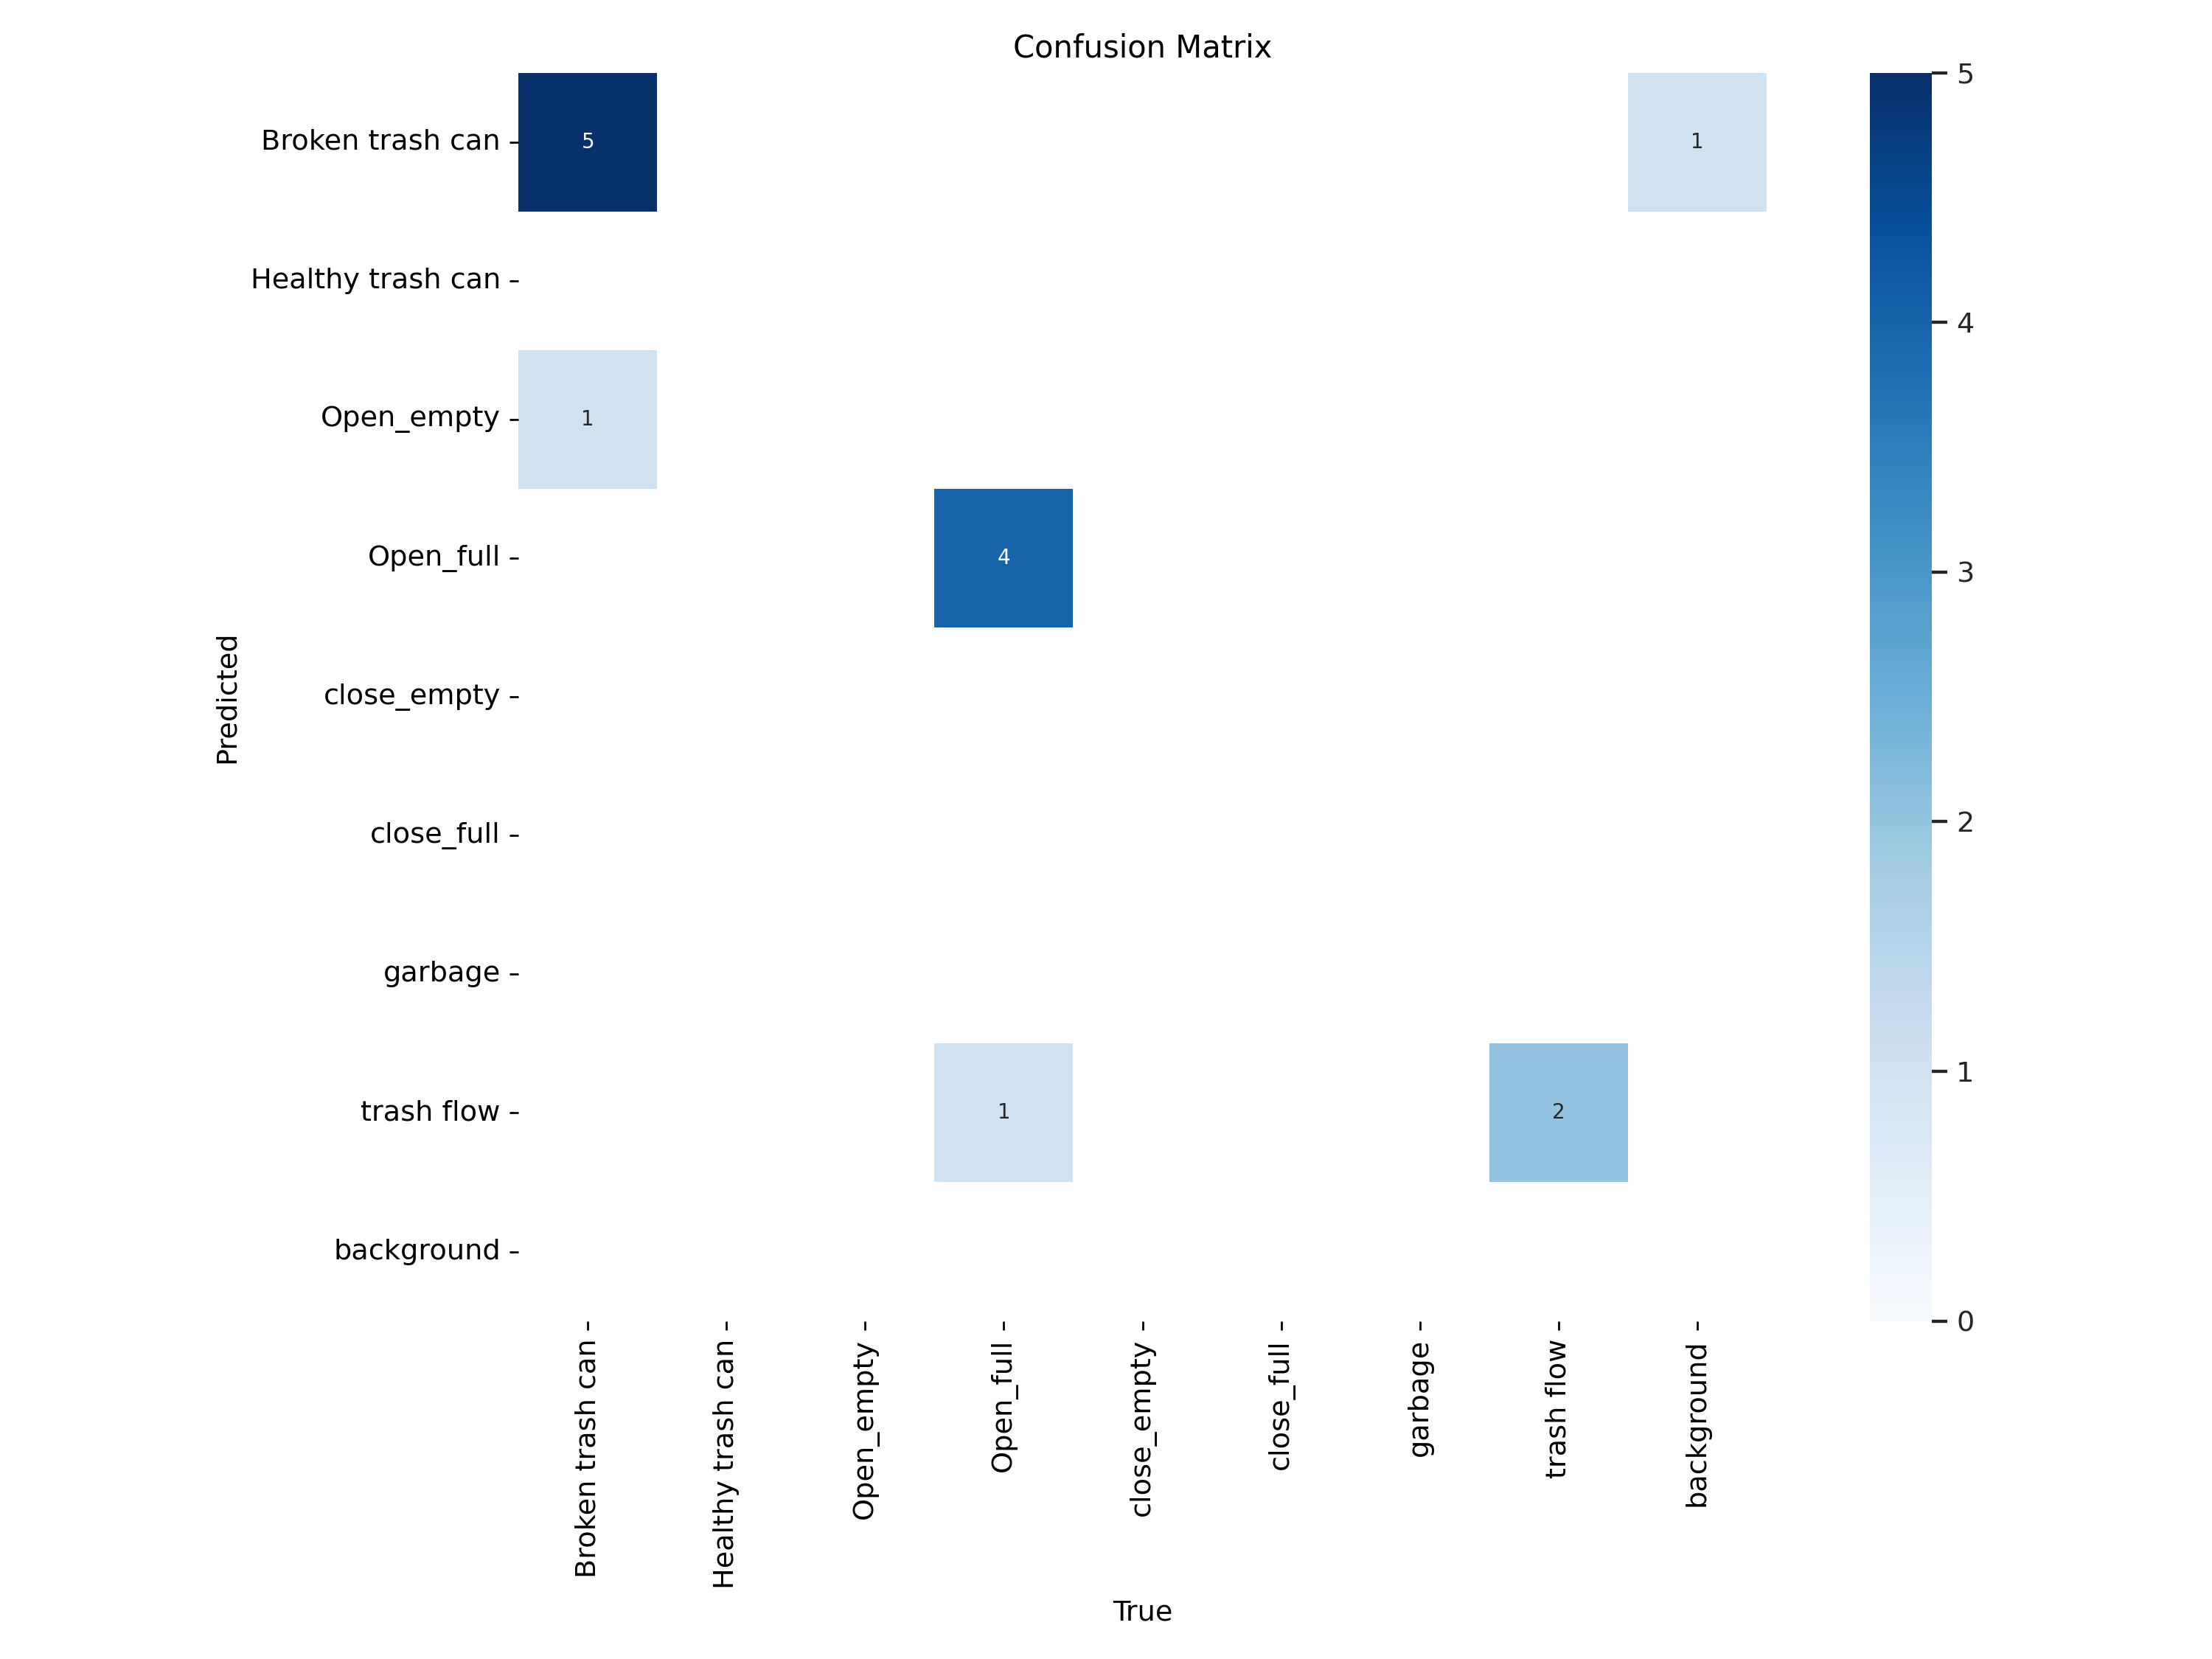

In [23]:
from IPython.display import Image

Image(filename=f'{HOME}/datasets/garbage_overflow-1/runs/detect/train/confusion_matrix.png', width=600)


/content


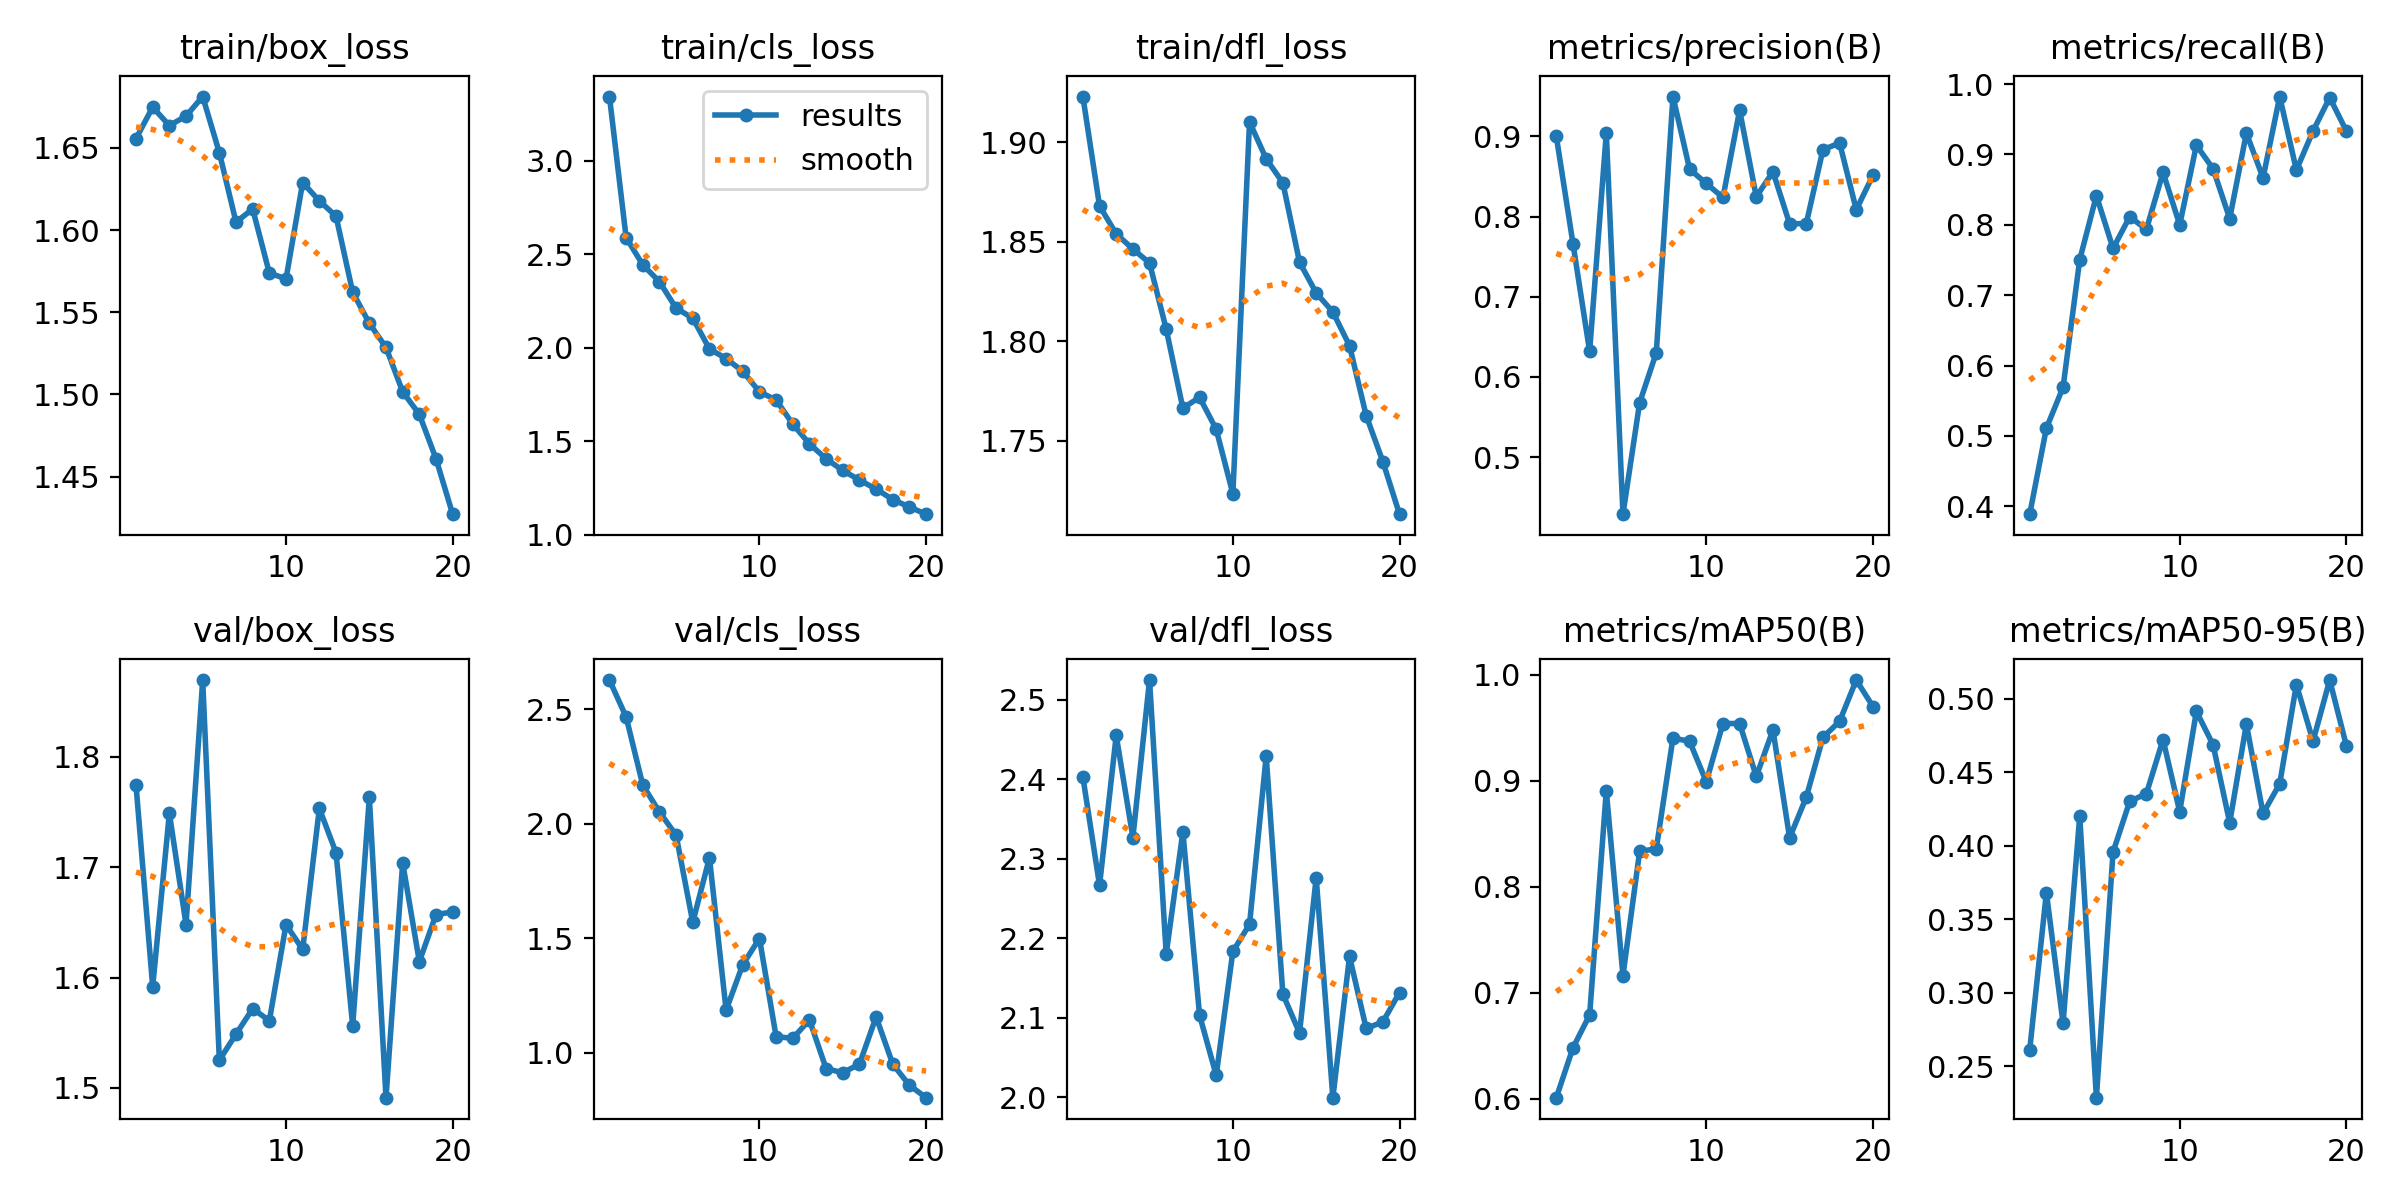

In [32]:
%cd {HOME}
Image(filename=f'{HOME}/datasets/garbage_overflow-1/runs/detect/train/results.png', width=600)

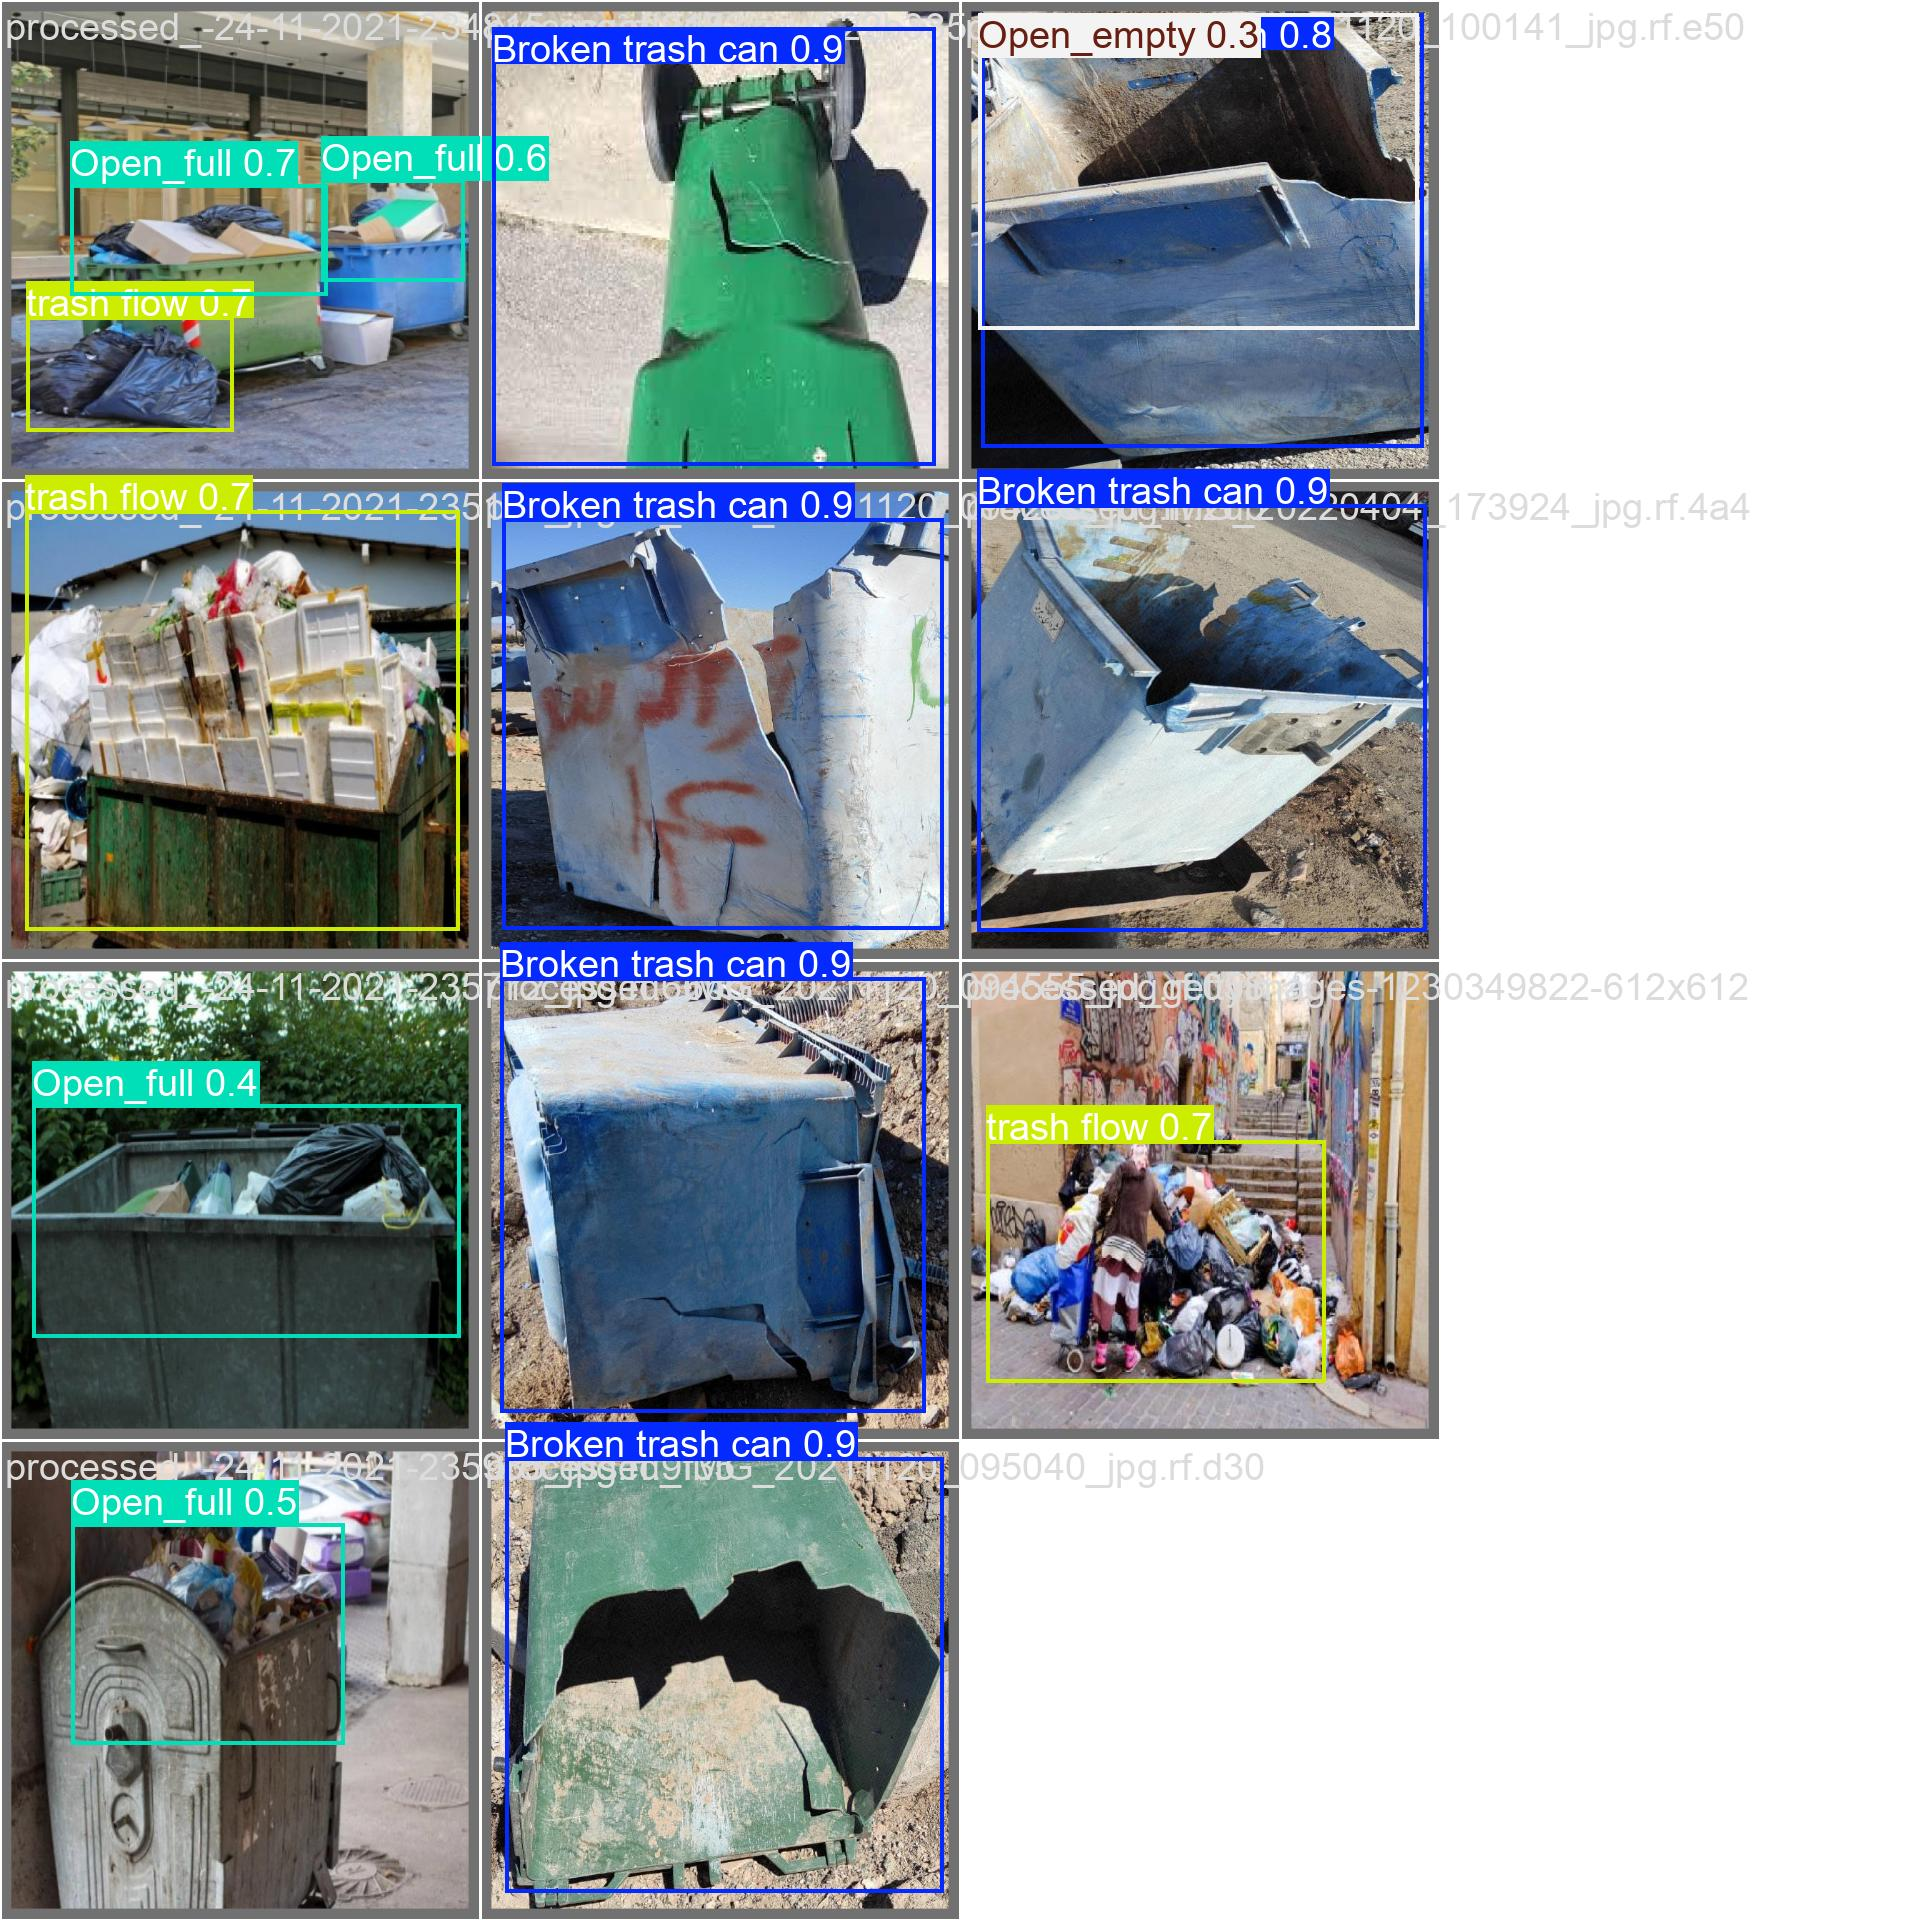

In [61]:
# Display results
from IPython.display import Image
Image(filename=f"{train_results_path}/confusion_matrix.png", width=600)
Image(filename=f"{train_results_path}/results.png", width=600)
Image(filename=f"{train_results_path}/val_batch0_pred.jpg", width=600)

In [25]:
# Predict using trained model
%cd {HOME}
!yolo task=detect mode=predict model={train_results_path}/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True


/content
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs

image 1/2 /content/datasets/garbage_overflow-1/test/images/processed_48_jpg.rf.012de642108e842ee0518f7f7e43bb25.jpg: 640x640 1 Healthy trash can, 9.7ms
image 2/2 /content/datasets/garbage_overflow-1/test/images/processed_gettyimages-157396726-612x612-1-_jpg.rf.91b1d376218182cb707816f1e8529b50.jpg: 640x640 1 trash flow, 7.4ms
Speed: 2.8ms preprocess, 8.6ms inference, 86.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


In [26]:
# Save predictions to Drive if mounted
if is_drive_mounted:
    !cp -r {HOME}/runs/detect/predict {drive_path}
    print(f"Predictions saved in Google Drive at: {drive_path}")



Predictions saved in Google Drive at: /content/drive/MyDrive/Yolo_Results


In [44]:
folder_path = "/content/drive/My Drive/Yolo_Results"
files = os.listdir(folder_path)
print("Contents of YOLO_Results folder:")
for file in files:
    print(file)


Contents of YOLO_Results folder:
train
predict


In [57]:
import pandas as pd

# Define correct path to your CSV
csv_path = "/content/drive/My Drive/Yolo_Results/train/results.csv"

# Read the CSV
df = pd.read_csv(csv_path)

# Clean up column names just in case
df.columns = df.columns.str.strip()

# View all column names to understand what’s available
print("Available columns:\n", df.columns.tolist())

# View precision, recall, mAP
columns_to_view = ['metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)']

# Display the selected columns
print("\nPerformance Metrics:")
print(df[columns_to_view])


Available columns:
 ['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss', 'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)', 'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss', 'lr/pg0', 'lr/pg1', 'lr/pg2']

Performance Metrics:
    metrics/precision(B)  metrics/recall(B)  metrics/mAP50(B)  \
0                0.90000            0.38889           0.60085   
1                0.76628            0.51111           0.64789   
2                0.63187            0.56915           0.67891   
3                0.90414            0.75045           0.89052   
4                0.42889            0.84137           0.71607   
5                0.56777            0.76655           0.83325   
6                0.63025            0.81150           0.83579   
7                0.94960            0.79351           0.94032   
8                0.85897            0.87450           0.93711   
9                0.84126            0.80000           0.89897   
10   

In [59]:
# Final precision
final_precision = df['metrics/precision(B)'].iloc[-1]
print("Final Precision:", final_precision)

# Final recall
final_recall = df['metrics/recall(B)'].iloc[-1]
print("Final Recall:", final_recall)

# Final mAP@0.5 (already shown earlier)
final_map50 = df['metrics/mAP50(B)'].iloc[-1]
print("Final mAP@0.5:", final_map50)


Final Precision: 0.85142
Final Recall: 0.93333
Final mAP@0.5: 0.97
